In [3]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parsing_utils import *
from utils.utils import *
from scripts.parse_results import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results2"
#RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_less_data/final_results1"
RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/final_results1"

RES_DIRS = []
#df = get_summary_df(RES_DIR)
RES_DIRS.append(RES_DIR)

dfs = []
for res_dir in RES_DIRS:
    df = get_summary_df(res_dir)
    if "final_results2" in res_dir:
        df = df[df.feat_rel_pg_ests_onehot == 1]
    df["res_dir"] = str(deterministic_hash(res_dir))[0:5]
    print(set(df["partition"]))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/final_results1/model_complexity-nested_loop_index7-mscn-df:1-nn:2:512-loss:flow_loss2-0.0--D0.1-531
skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/final_results1/less_training_data-nested_loop_index7-mscn-df:1-nn:2:128-loss:mse-0.0--D0.1-143
skipping  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/final_results1/model_complexity-nested_loop_index7-mscn-df:1-nn:2:512-loss:mse-0.0--D0.1-112
{'0'}


In [6]:
df = df[df["alg_name"] != "true"]
df = df[df["alg_name"] != "postgres"]

all_df = df[df["template"] != "all"]
df = df[df["template"] == "all"]
df = df[df["summary_type"] == "mean"]
df = df[df["flow_features"] == 1]

print(set(df["alg_name"]))
print(set(df["flow_features"]))
print(set(df["feat_rel_pg_ests_onehot"]))
print(set(df["hidden_layer_size"]))
print(set(df["max_discrete_featurizing_buckets"]))
print(set(df["test_size"]))

#ERRORS = ["qerr", "plan_err", "jerr", "cm1_jerr"]
ERRORS = ["qerr", "cm1_jerr"]
HUE_COLORS = {}

HUE_COLORS["mse"] = "green"
HUE_COLORS["flow_loss2"] = "blue"
ORDER = ["train", "test"]

{'mse', 'flow_loss2'}
{1}
{1}
{512, 256, 64, 128}
{1, 10, 5}
{0.5}


In [7]:
set(df["samples_type"])

{'job', 'test', 'train'}

In [9]:
df2 = df[df.samples_type == "test"]
df2 = df2[df2.max_discrete_featurizing_buckets==5]
df2 = df2[df2.hidden_layer_size==64]
df2 = df2[df2.loss_type=="qerr"]
#df2 = df2[df2.num_tables=="all"]
#print(df2["loss"])
#print(df2.keys())

In [10]:
df = df.rename(columns={"max_discrete_featurizing_buckets":"buckets"})

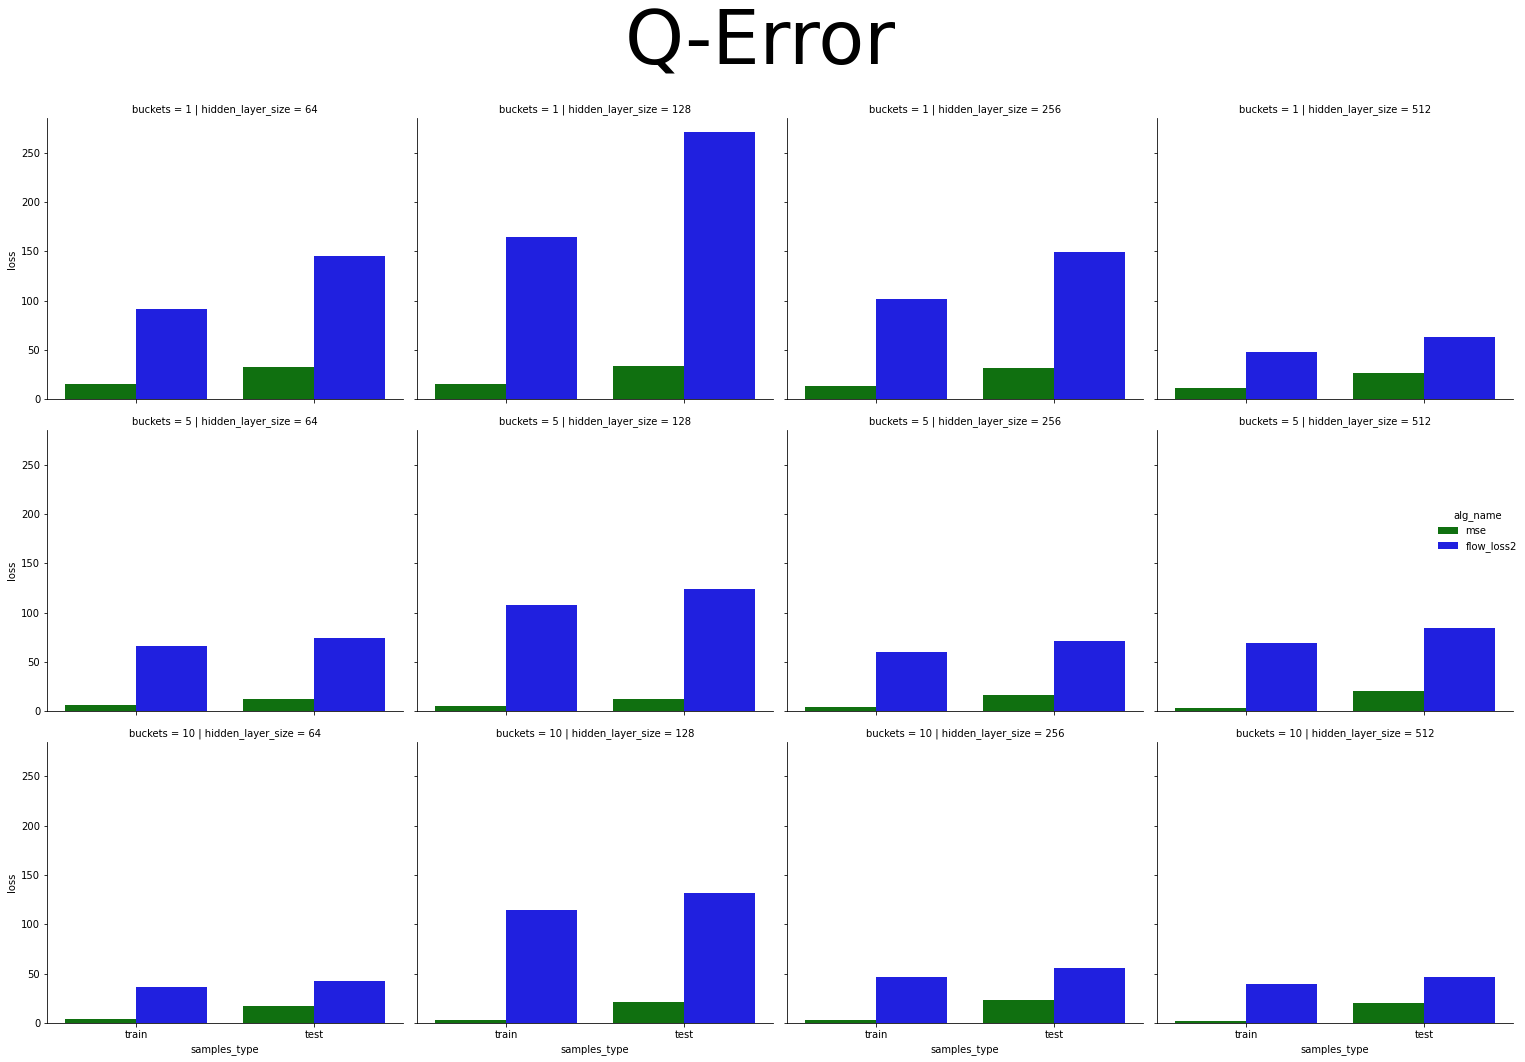

<Figure size 432x288 with 0 Axes>

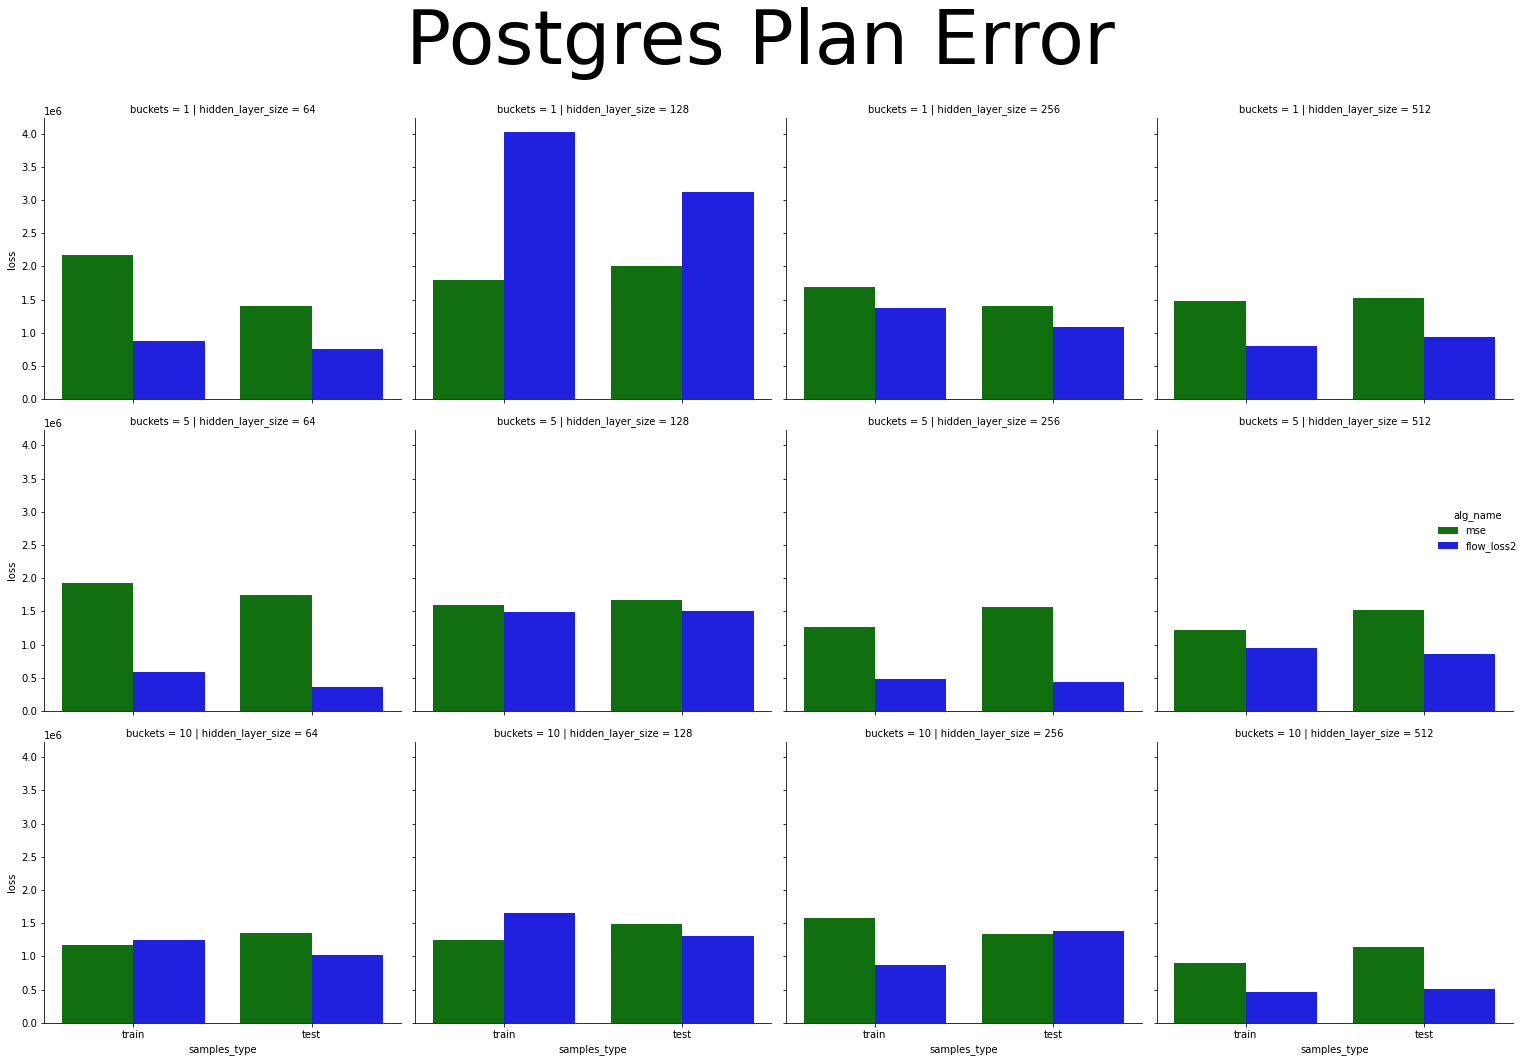

<Figure size 432x288 with 0 Axes>

In [130]:
construct_summary_final_model_complexity(df, "errors", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=ORDER)

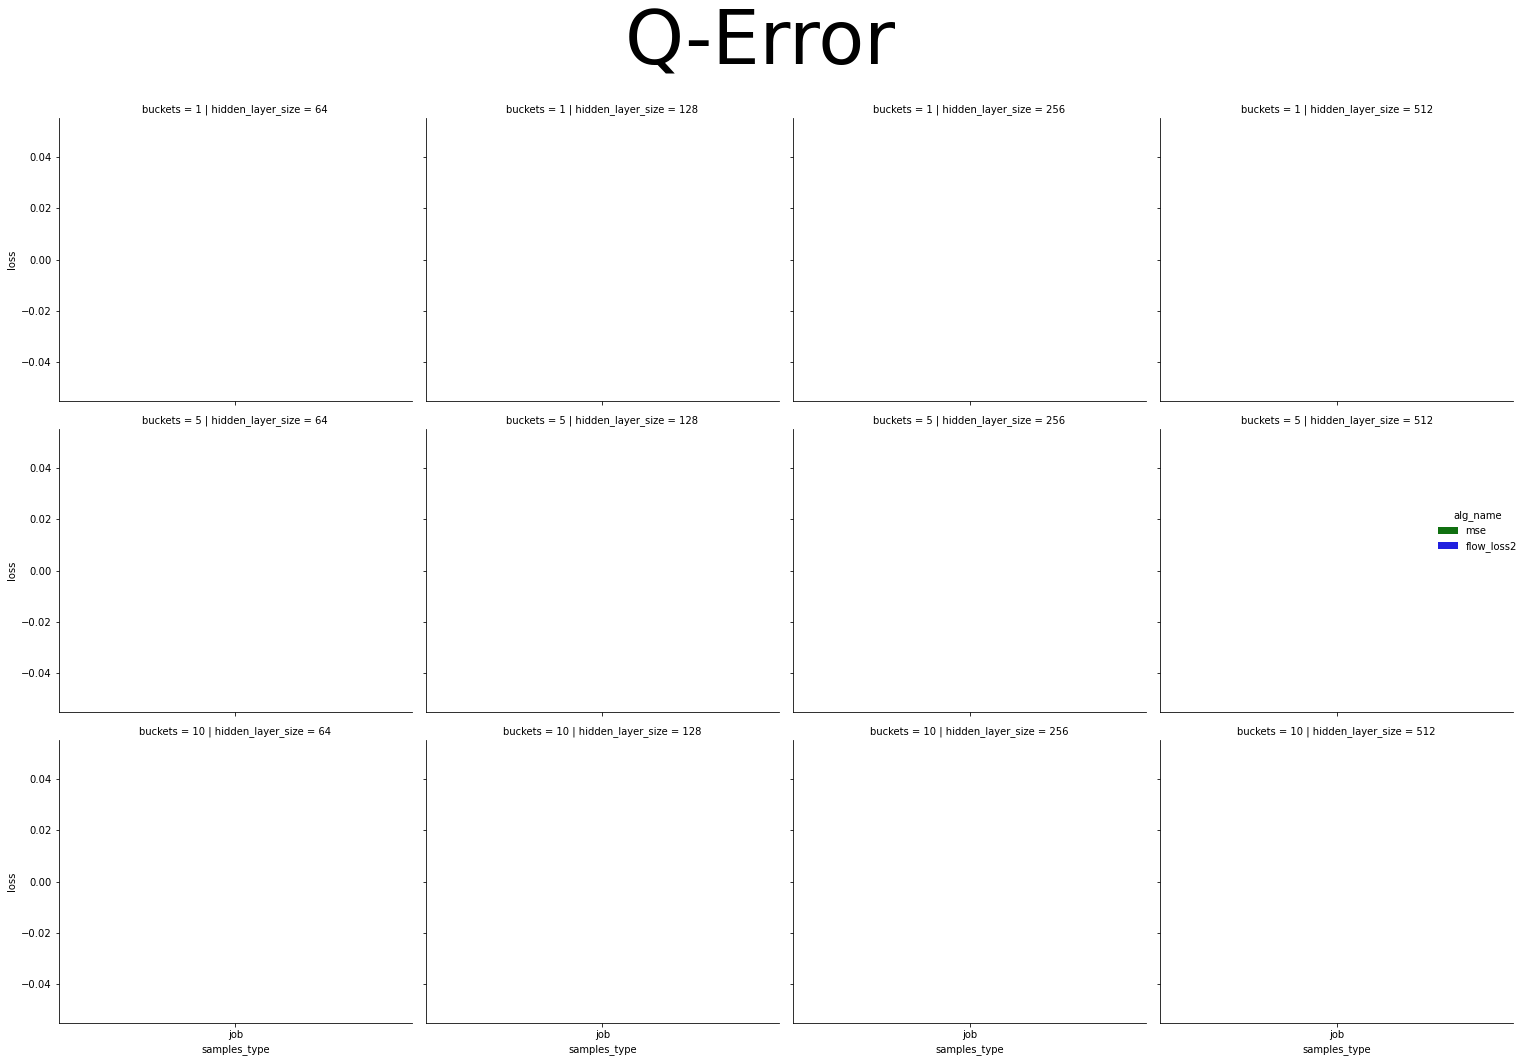

<Figure size 432x288 with 0 Axes>

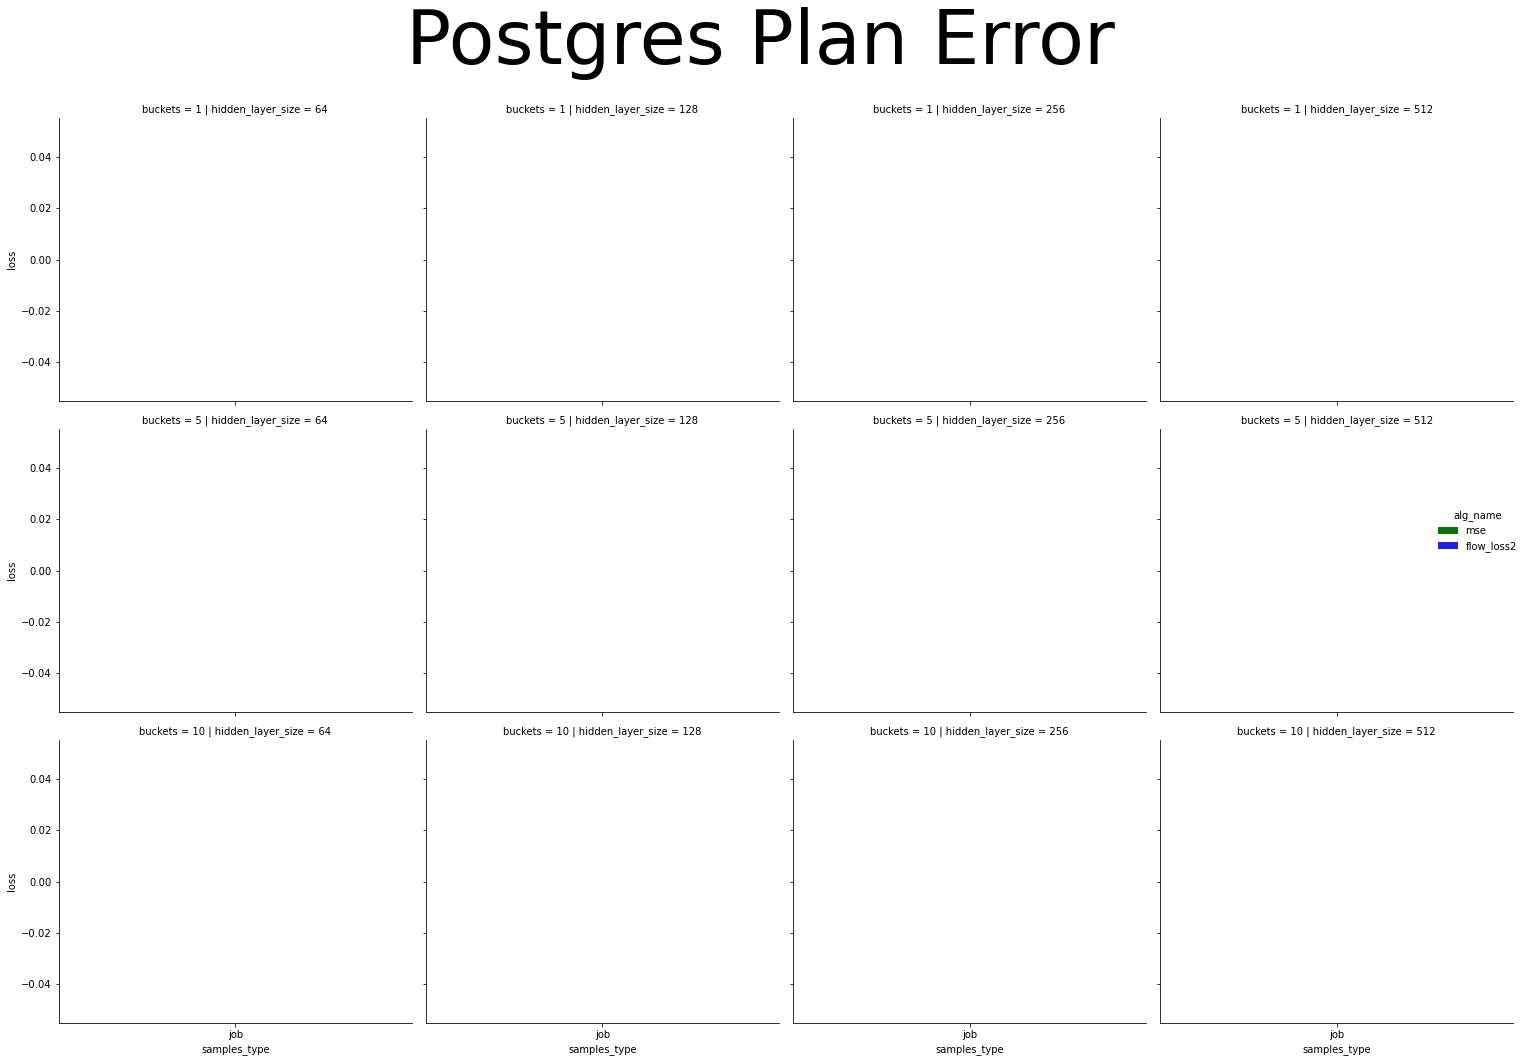

<Figure size 432x288 with 0 Axes>

In [11]:
construct_summary_final_model_complexity(df, "errors", ERRORS, HUE_COLORS=HUE_COLORS, ORDER=["job"])

In [13]:
df2 = df[df.samples_type == "job"]

In [14]:
df2.head(5)

,loss_type,loss,summary_type,template,num_samples,samples_type,query_directory,cost_model,join_loss_data_file,exp_prefix,...,use_svd,num_singular_vals,num_bins,cl_recompute,pgm_sampling_percentage,pgm_merge_aliases,alg,alg_name,partition,res_dir
272,qerr,4.038644e+06,mean,all,31512,job,./our_dataset/queries,nested_loop_index7,None,model_complexity,...,0,5,100,0,0.001,0,mscn,mse,0,41514
560,jerr,1.403916e+06,mean,all,105,job,./our_dataset/queries,nested_loop_index7,None,model_complexity,...,0,5,100,0,0.001,0,mscn,mse,0,41514
848,cm1_jerr,1.416668e+06,mean,all,105,job,./our_dataset/queries,nested_loop_index7,None,model_complexity,...,0,5,100,0,0.001,0,mscn,mse,0,41514
1136,plan_err,1.337514e+06,mean,all,105,job,./our_dataset/queries,nested_loop_index7,None,model_complexity,...,0,5,100,0,0.001,0,mscn,mse,0,41514
1424,plan_pg_err,1.689106e+06,mean,all,105,job,./our_dataset/queries,nested_loop_index7,None,model_complexity,...,0,5,100,0,0.001,0,mscn,mse,0,41514


In [16]:
df2.groupby(["alg", "hidden_layer_size", "buckets", "loss_type"])["loss"].mean()

alg   hidden_layer_size  buckets  loss_type  
mscn  64                 1        cm1_jerr       3.439214e+05
                                  flow_err       3.151424e+08
                                  jerr           6.060520e+05
                                  plan_err       6.580146e+05
                                  plan_pg_err    9.403993e+05
                                                     ...     
      512                10       flow_err       1.707943e+09
                                  jerr           5.998555e+07
                                  plan_err       1.153671e+06
                                  plan_pg_err    1.697523e+06
                                  qerr           1.394460e+07
Name: loss, Length: 72, dtype: float64

In [17]:
df3 = df2[df2.loss_type == "cm1_jerr"]

In [19]:
df3.groupby(["alg", "loss_func", "hidden_layer_size", "buckets"])["loss"].mean()

alg   loss_func   hidden_layer_size  buckets
mscn  flow_loss2  64                 1          2.171557e+05
                                     5          1.623535e+05
                                     10         1.540184e+05
                  128                1          1.428375e+05
                                     5          1.351163e+05
                                     10         2.305323e+05
                  256                1          3.393485e+05
                                     5          1.923166e+05
                                     10         1.834636e+05
                  512                1          1.862567e+05
                                     5          1.795200e+05
                                     10         2.167877e+05
      mse         64                 1          4.073042e+05
                                     5          4.690722e+05
                                     10         2.593077e+05
                  128                1  